Accidents occur often and the severity of the accidents typically requires a different response from authorities and other road users. 
Knowing the severity of a car accident can be incredibly important in helping road users make an assessment of how to navigate the road system to avoid exacerbating the situation. 
This can help road user re-route to alternate routes, and avoid congesting road ways where emergency services might need to use to provide critical aid to those hurt in an accident 
and likely save more lives.


Additionally, the impact of a severe accident to the other motorists cannot be understated. Predicting severity of accidents 
can help other motorists avoid such areas which will typically be congested and thereby saving motorists an inordinate amount of time. 
This will make for a generally pleasant commute time. The goal of this project is to develop a supervised machine learning model that 
would help a road user to predict car accident severity with reasonably high accuracy.

The data used in the project will the be the "Data-collisions.csv" file provided by the capstone project. The file has 194,673 rows and 38 columns. 
The target column is the Severitycode which has two states. 1 for slight accident with property damage and 2 for a severe accident with resulting injury.

Several key columns such weather, road condition and light conditions are missing data that will need to be imputed or dropped as necessary. 
There are several columns that are meaningingless and will need to be dropped from the dataset such as the object column which is merely a sequence numbering of the rows. 
This will be dropped during data preparation for modeling. Other columns such as reportno that do not add value to the modeling will also be evaluated and 
possibly dropped from the modeling during data preparation stage.

Severitycode column is duplicated. Data is imbalanced with more data showing cases where severity is lower i.e property damage compared 
with data showing a higher severity of injury. modeling will need to account for this appropriate i.e potentially using downsampling techniques.

Our modeling will perform a univariate and bivariate analysis of the different inputs to ascertain if they have a meaningful influence in 
the prediction. For example, the location where the accident occurred, the weather and road conditions will be evaluated. Time of accident 
will also be important to evaluate to see if there is any correlation with severity of accident.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
data = pd.read_csv('Data-Collisions.csv')

c:\users\pakam\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
data.shape

(194673, 38)

In [5]:
data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
data.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [7]:
data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
data['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [9]:
data['SDOT_COLCODE'].value_counts()

11    85209
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
51     1312
29      479
21      181
56      180
27      166
54      139
23      124
48      107
31      104
25      102
34       93
64       75
69       69
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

In [10]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [11]:
data.dtypes

SEVERITYCODE         int64
X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO          category
STATUS            category
ADDRTYPE          category
INTKEY             float64
LOCATION          category
EXCEPTRSNCODE     category
EXCEPTRSNDESC     category
SEVERITYCODE.1       int64
SEVERITYDESC      category
COLLISIONTYPE     category
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INCDATE           category
INCDTTM           category
JUNCTIONTYPE      category
SDOT_COLCODE         int64
SDOT_COLDESC      category
INATTENTIONIND    category
UNDERINFL         category
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT     category
SDOTCOLNUM         float64
SPEEDING          category
ST_COLCODE        category
ST_COLDESC        category
SEGLANEKEY           int64
CROSSWALKKEY         int64
H

In [12]:
data.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

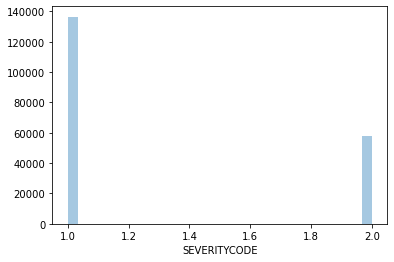

In [13]:
sns.distplot(data['SEVERITYCODE'], kde = False)

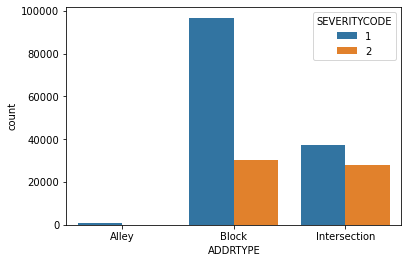

In [14]:
sns.countplot(data['ADDRTYPE'],hue=data['SEVERITYCODE']);

In [15]:

def plot_corr(data, size=20):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

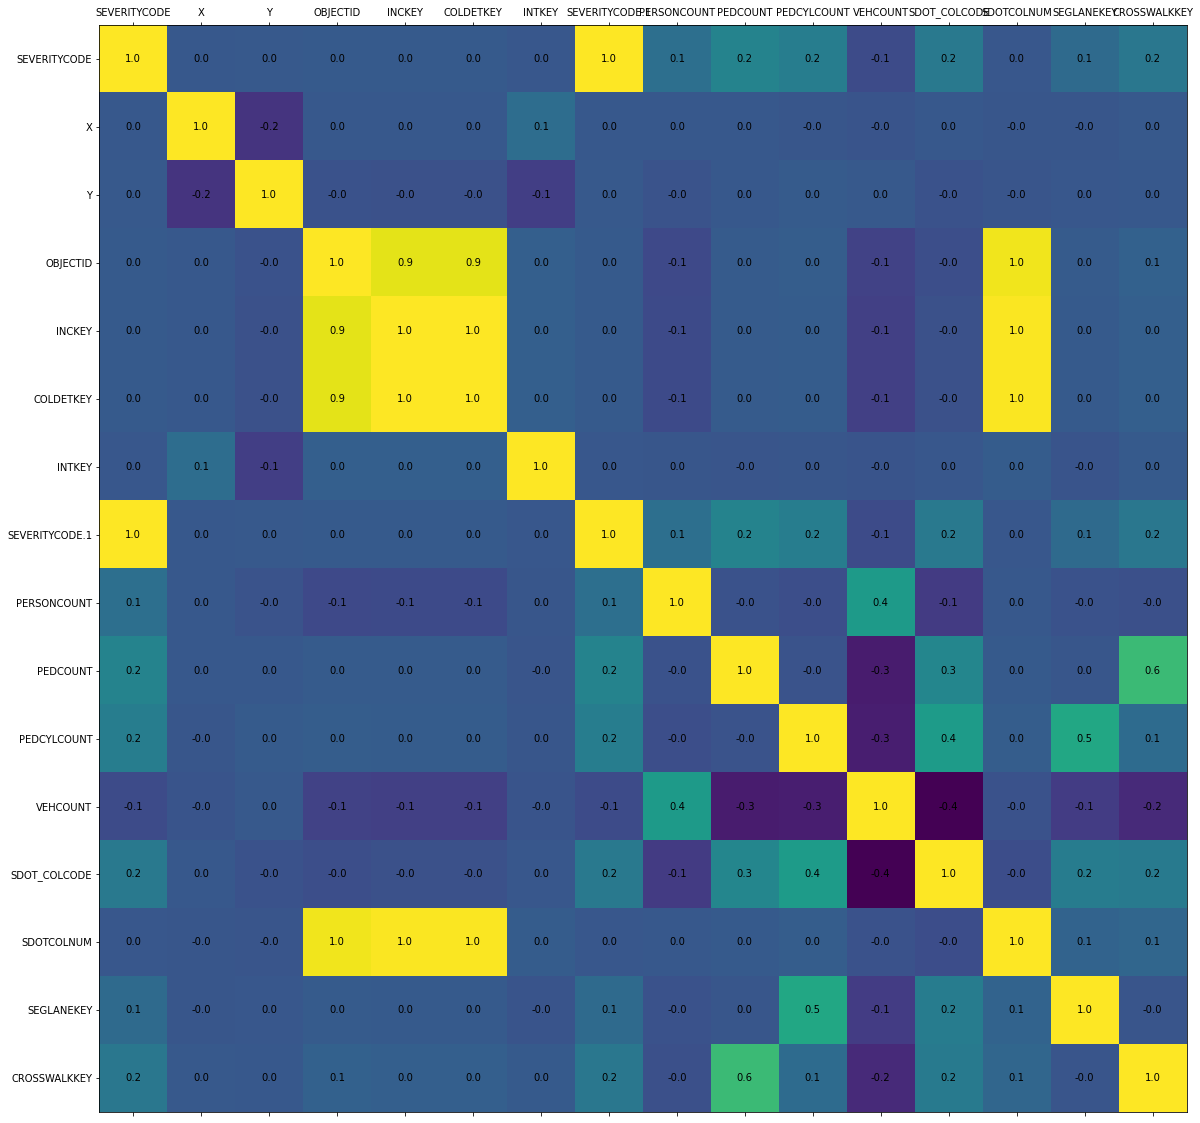

In [16]:
plot_corr(data)

In [17]:
replaceStruct = {

             #   "HITPARKEDCAR":     {"N": 0, "Y": 1 },
              
                "SEVERITYCODE":     { 1 : 0, 2 : 1 } 
                    }
data=data.replace(replaceStruct)

In [18]:
data.drop(["ADDRTYPE","LOCATION","SEVERITYCODE.1","EXCEPTRSNDESC","INCDATE","INCDTTM","SEVERITYDESC","COLLISIONTYPE","JUNCTIONTYPE","SPEEDING","PEDROWNOTGRNT","SDOT_COLDESC","ST_COLDESC","SDOT_COLCODE"],axis=1,inplace=True)
data.drop(["X","Y", "INTKEY", "EXCEPTRSNCODE","SDOTCOLNUM", "INATTENTIONIND", "HITPARKEDCAR", "ST_COLCODE","SEGLANEKEY","CROSSWALKKEY","OBJECTID","REPORTNO","INCKEY","STATUS","COLDETKEY"],axis=1,inplace=True)
data.drop(data.columns[1], axis = 1)

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,1,0,0,2,N,Overcast,Wet,Daylight
1,0,0,0,2,0,Raining,Wet,Dark - Street Lights On
2,0,0,0,3,0,Overcast,Dry,Daylight
3,0,0,0,3,N,Clear,Dry,Daylight
4,1,0,0,2,0,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...
194668,1,0,0,2,N,Clear,Dry,Daylight
194669,0,0,0,2,N,Raining,Wet,Daylight
194670,1,0,0,2,N,Clear,Dry,Daylight
194671,1,0,1,1,N,Clear,Dry,Dusk


In [19]:
data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,1,2,0,0,2,N,Overcast,Wet,Daylight
1,0,2,0,0,2,0,Raining,Wet,Dark - Street Lights On
2,0,4,0,0,3,0,Overcast,Dry,Daylight
3,0,3,0,0,3,N,Clear,Dry,Daylight
4,1,2,0,0,2,0,Raining,Wet,Daylight


In [20]:
data.shape


(194673, 9)

In [21]:
data.isnull().sum()

SEVERITYCODE       0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
UNDERINFL       4884
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [22]:
data.nunique()


SEVERITYCODE     2
PERSONCOUNT     47
PEDCOUNT         7
PEDCYLCOUNT      3
VEHCOUNT        13
UNDERINFL        4
WEATHER         11
ROADCOND         9
LIGHTCOND        9
dtype: int64

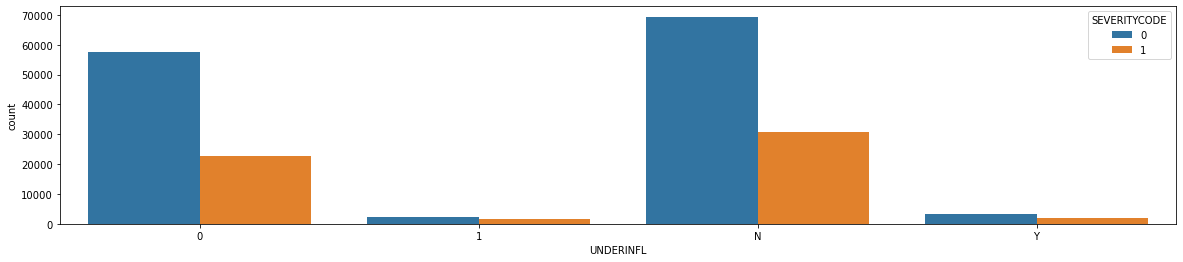

In [23]:
plt.figure(figsize = (20,4))
sns.countplot(data["UNDERINFL"],hue=data['SEVERITYCODE']);

In [24]:
temp ={"N": 0,"Y": 1, "0": 0, "1":1}
data["UNDERINFL"].replace(temp, inplace=True)
data['UNDERINFL'] = data['UNDERINFL'].fillna(0)
data["UNDERINFL"].value_counts()

0.0    185552
1.0      9121
Name: UNDERINFL, dtype: int64

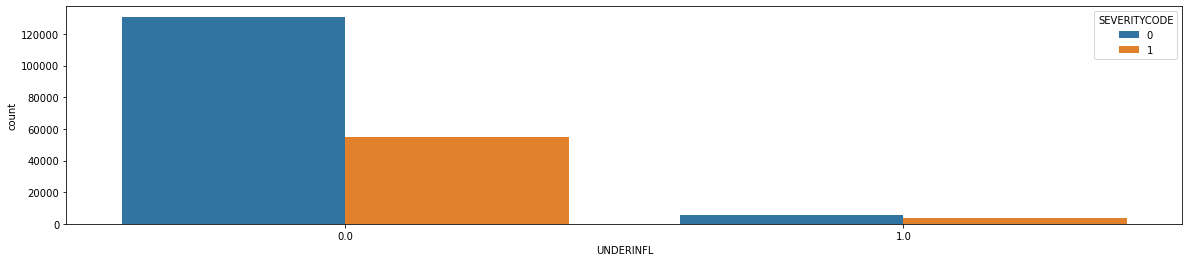

In [25]:
plt.figure(figsize = (20,4))
sns.countplot(data["UNDERINFL"],hue=data['SEVERITYCODE']);

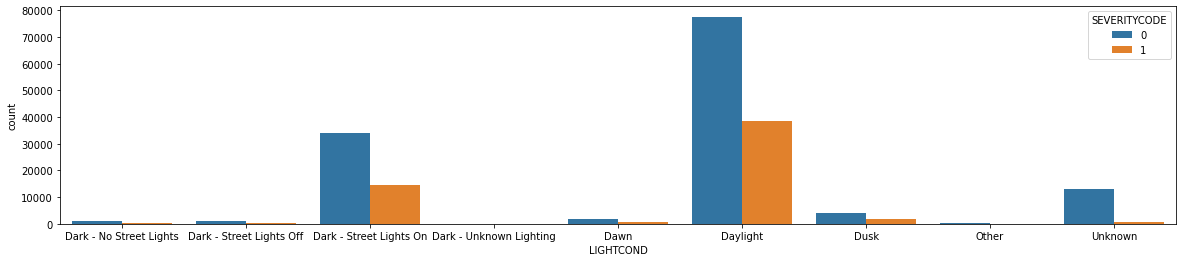

In [26]:
plt.figure(figsize = (20,4))
sns.countplot(data["LIGHTCOND"],hue=data['SEVERITYCODE']);

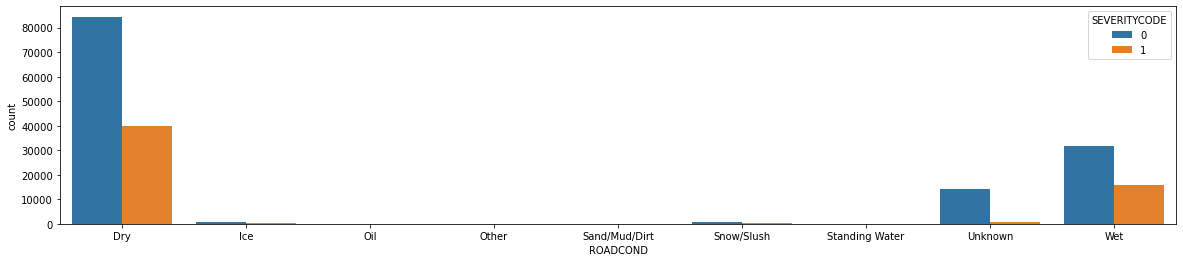

In [27]:
plt.figure(figsize = (20,4))
sns.countplot(data["ROADCOND"],hue=data['SEVERITYCODE']);

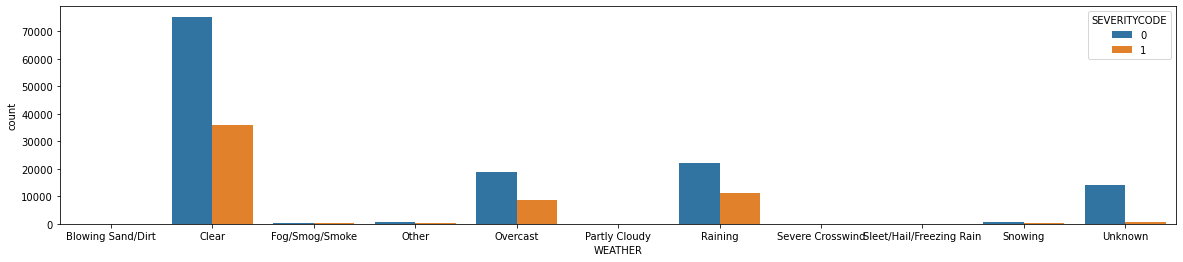

In [28]:
plt.figure(figsize = (20,4))
sns.countplot(data["WEATHER"],hue=data['SEVERITYCODE']);

In [29]:
oneHotCols =['WEATHER','ROADCOND','LIGHTCOND']                   
data=pd.get_dummies(data, columns=oneHotCols)

In [30]:
X = data.drop("SEVERITYCODE" , axis=1)
y = data.pop("SEVERITYCODE")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [31]:
data.columns

Index(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'UNDERINFL',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy',
       'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown'],
      dtype='object')

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)


dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
score2 = dTree.score(X_test, y_test)

0.7603965627316157
0.7539125372418752


In [33]:
np.where(np.isnan(data))

(array([], dtype=int32), array([], dtype=int32))

In [34]:
importance = dTree.feature_importances_

In [35]:
importance

array([2.26972829e-01, 3.29620348e-01, 2.40650905e-01, 3.55845286e-02,
       1.00510844e-02, 5.38847401e-04, 5.77575558e-03, 2.40379682e-03,
       1.94483253e-03, 6.68141688e-03, 1.03310180e-04, 5.63891582e-03,
       2.90262152e-04, 1.14319954e-03, 2.35510722e-03, 3.03262209e-03,
       6.70272587e-03, 2.60146338e-03, 6.52109580e-04, 9.69431649e-04,
       6.03522162e-04, 2.48211029e-03, 1.10933263e-03, 6.13862950e-02,
       7.77217388e-03, 2.64538338e-03, 2.31795913e-03, 5.86535110e-03,
       6.68652315e-05, 3.34883231e-03, 1.09756363e-02, 3.57865105e-03,
       1.14024290e-03, 1.29941529e-02])

Feature: 0, Score: 0.22697
Feature: 1, Score: 0.32962
Feature: 2, Score: 0.24065
Feature: 3, Score: 0.03558
Feature: 4, Score: 0.01005
Feature: 5, Score: 0.00054
Feature: 6, Score: 0.00578
Feature: 7, Score: 0.00240
Feature: 8, Score: 0.00194
Feature: 9, Score: 0.00668
Feature: 10, Score: 0.00010
Feature: 11, Score: 0.00564
Feature: 12, Score: 0.00029
Feature: 13, Score: 0.00114
Feature: 14, Score: 0.00236
Feature: 15, Score: 0.00303
Feature: 16, Score: 0.00670
Feature: 17, Score: 0.00260
Feature: 18, Score: 0.00065
Feature: 19, Score: 0.00097
Feature: 20, Score: 0.00060
Feature: 21, Score: 0.00248
Feature: 22, Score: 0.00111
Feature: 23, Score: 0.06139
Feature: 24, Score: 0.00777
Feature: 25, Score: 0.00265
Feature: 26, Score: 0.00232
Feature: 27, Score: 0.00587
Feature: 28, Score: 0.00007
Feature: 29, Score: 0.00335
Feature: 30, Score: 0.01098
Feature: 31, Score: 0.00358
Feature: 32, Score: 0.00114
Feature: 33, Score: 0.01299


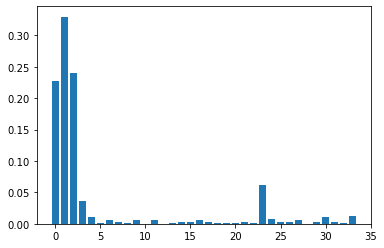

In [36]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [43]:
#Features Importance
pd.Series(dTree.feature_importances_, X_train.columns ).sort_values(ascending= False)

PEDCOUNT                              0.329620
PEDCYLCOUNT                           0.240651
PERSONCOUNT                           0.226973
ROADCOND_Unknown                      0.061386
VEHCOUNT                              0.035585
LIGHTCOND_Unknown                     0.012994
LIGHTCOND_Daylight                    0.010976
UNDERINFL                             0.010051
ROADCOND_Wet                          0.007772
ROADCOND_Dry                          0.006703
WEATHER_Overcast                      0.006681
LIGHTCOND_Dark - Street Lights On     0.005865
WEATHER_Clear                         0.005776
WEATHER_Raining                       0.005639
LIGHTCOND_Dusk                        0.003579
LIGHTCOND_Dawn                        0.003349
WEATHER_Unknown                       0.003033
LIGHTCOND_Dark - No Street Lights     0.002645
ROADCOND_Ice                          0.002601
ROADCOND_Snow/Slush                   0.002482
WEATHER_Fog/Smog/Smoke                0.002404
WEATHER_Snowi

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.7538098010342111


In [47]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score1

c:\users\pakam\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7527824389575699

In [50]:
data = {'Technique' : ['Logistic Regression', 'Decision tree',
                       'Random forest'],
       'Score' : [score1, score4, score2] }

result = pd.DataFrame(data)
result

,Technique,Score
0,Logistic Regression,0.752782
1,Decision tree,0.753810
2,Random forest,0.753913


0.7539125372418752


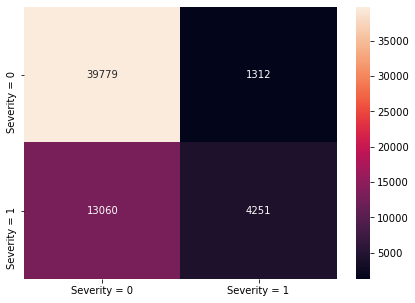

In [54]:
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Severity = 0","Severity = 1"]],
                  columns = [i for i in ["Severity = 0","Severity = 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [58]:
from sklearn.metrics import recall_score, precision_score
recall_score(y_test,dTree.predict(X_test))

0.2455664028652302

In [59]:
precision_score(y_test,dTree.predict(X_test))

0.7641560309185691